In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from GetData import *

c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:139: SettingWithCopyWarning: 
A value is trying

GW170817 was the first neutron star merger detected and GW190425 is another known neutron star merger, so the method that is being used to discriminate neutron star mergers from black hole mergers is working properly. 

<Axes: xlabel='total_mass', ylabel='Count'>

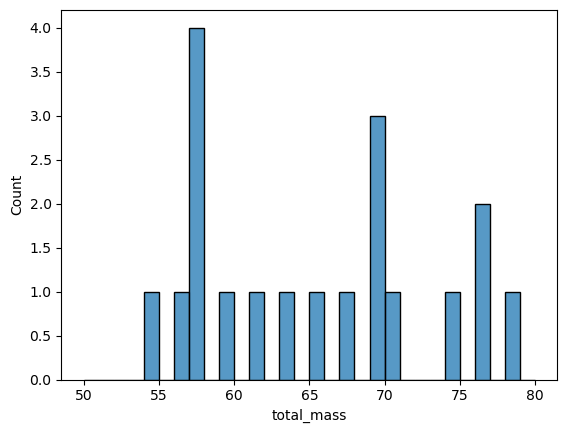

In [2]:
sns.histplot(O2["total_mass"], binwidth=1, binrange=[50, 80])

In [3]:
bin = O2[O2["total_mass"] >= 57.5]
bin = bin[bin["total_mass"] <= 58]
bin

,name,simple_name,catalog,confidence,version,group_name,group,gps,far,snr,...,is_O2,is_O3,mass_1_source,mass_2_source,network_matched_filter_snr,chi_eff,chirp_mass_source,combined_far,p_astro,M_tot
10,GW190828_063405-v2,GW190828,confident,3,2,O2,2,1.251009e+09,0.00001,16.5,...,True,False,31.9,25.8,16.5,0.15,24.6,0.00001,1.00000,57.7
27,GW190527_092055-v2,GW190527,confident,3,2,O2,2,1.242984e+09,0.23000,8.0,...,True,False,35.6,22.2,8.0,0.10,23.9,0.23000,0.84784,57.8
40,GW190413_052954-v2,GW190413,confident,3,2,O2,2,1.239169e+09,0.82000,9.0,...,True,False,33.7,24.2,9.0,-0.04,24.5,0.82000,0.92750,57.9


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

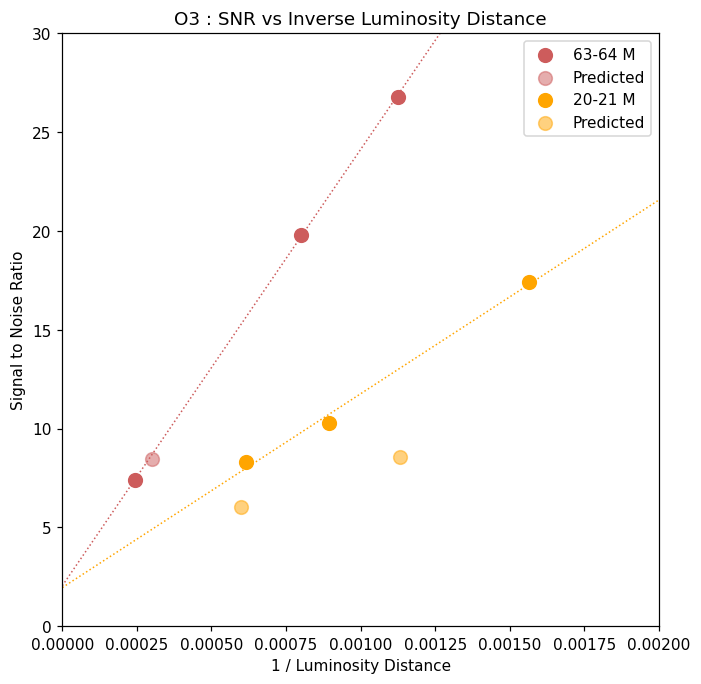

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [63, 20]
bin_highs = [64, 21]
colors = ["indianred", "orange", "darkcyan", "dodgerblue", "slateblue"]

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O3[O3["total_mass"] >= low]
    values = values[values["total_mass"] <= high]
    a, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + b, color=color, linestyle=":", linewidth=1)

    values = O3_all_predicted[O3_all_predicted["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, alpha=0.5, label="Predicted")

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.002)
ax.set_ylim(0, 30)

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

Text(0.5, 1.0, 'O2 : SNR vs Inverse Luminosity Distance')

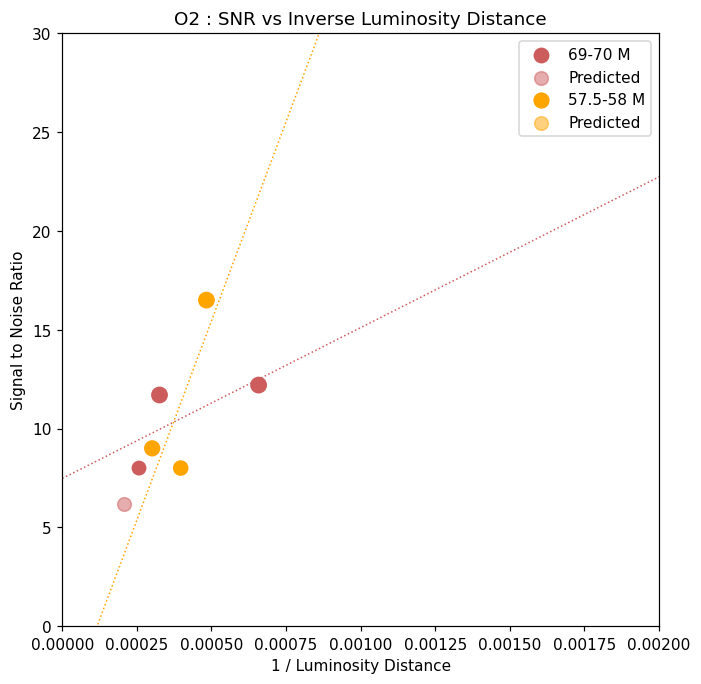

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [69, 57.5]
bin_highs = [70, 58]
colors = ["indianred", "orange", "darkcyan", "dodgerblue", "slateblue"]

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O2[O2["total_mass"] >= low]
    values = values[values["total_mass"] <= high]
    a, b = np.polyfit(1 / values["luminosity_distance"], values["snr"], 1)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=100 * values["prob"], label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + b, color=color, linestyle=":", linewidth=1)

    values = O3_all_predicted[O3_all_predicted["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, s=80, alpha=0.5, label="Predicted")

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.002)
ax.set_ylim(0, 30)

ax.set_title("O2 : SNR vs Inverse Luminosity Distance")

<Axes: xlabel='total_mass', ylabel='Count'>

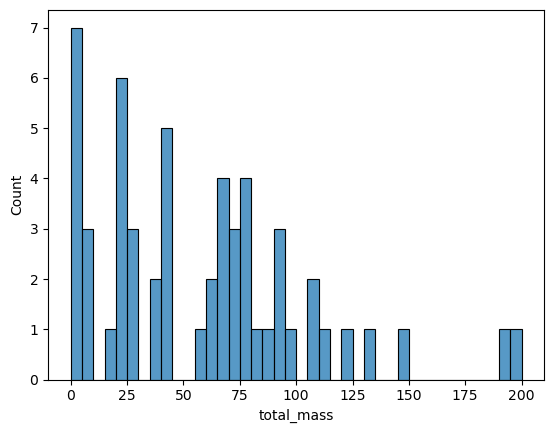

In [6]:
sns.histplot(O3_events["total_mass"], binwidth=5, binrange=[0, 200])

<Axes: xlabel='total_mass', ylabel='Count'>

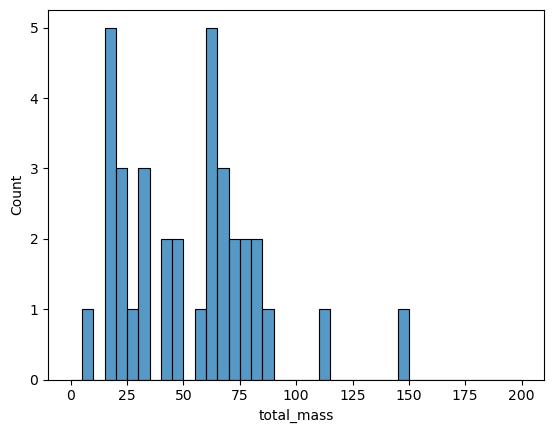

In [7]:
sns.histplot(O3["total_mass"], binwidth=5, binrange=[0, 200])

<Axes: xlabel='total_mass', ylabel='Count'>

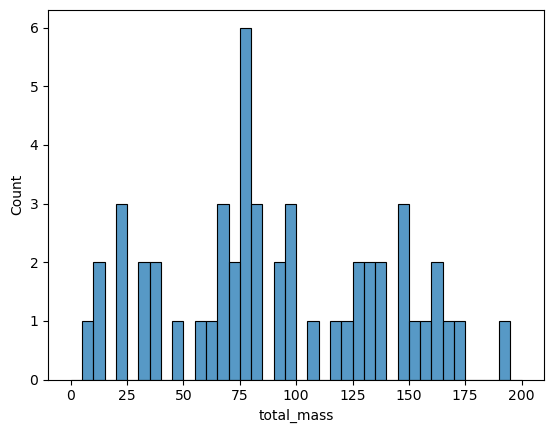

In [8]:
sns.histplot(O4_events["total_mass"], binwidth=5, binrange=[0, 200])

Text(0.5, 1.0, 'O3 vs O4')

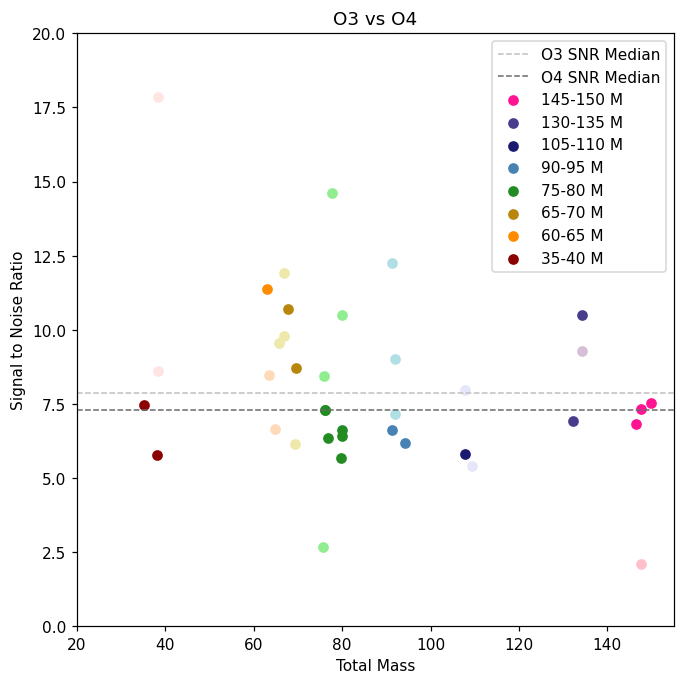

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [145, 130, 105, 90, 75, 65, 60, 35, 20]
bin_highs = [150, 135, 110, 95, 80, 70, 65, 40, 25]
O3_colors = ["pink", "thistle", "lavender", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "midnightblue", "steelblue", "forestgreen", "darkgoldenrod", "darkorange", "darkred"]

median_O3_SNR = np.median(O3_events["snr"])
ax.axhline(median_O3_SNR, color="silver", linestyle="--", linewidth=1, label="O3 SNR Median")

median_O4_SNR = np.median(O4_events["snr"])
ax.axhline(median_O4_SNR, color="dimgrey", linestyle="--", linewidth=1, label="O4 SNR Median")

for low, high, O3color, O4color in zip(bin_lows, bin_highs, O3_colors, O4_colors):
    O3values = O3_events[O3_events["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], color=O3color)

    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color, label=f"{low}-{high} M")

    line_values = np.array([0, 100])

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(20, 155)
ax.set_ylim(0, 20)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

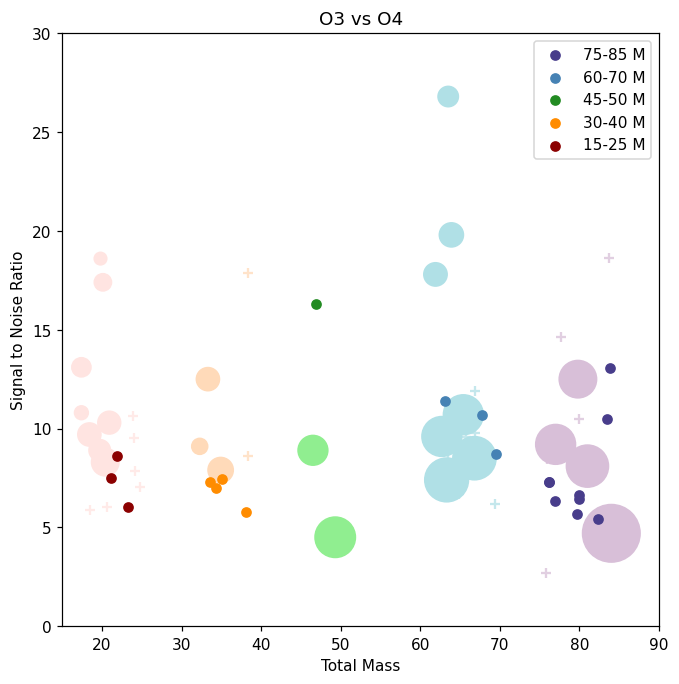

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [75, 60, 45, 30, 15]
bin_highs = [85, 70, 50, 40, 25]
O3_colors = ["thistle", "powderblue", "lightgreen", "peachpuff", "mistyrose"]
O4_colors = ["darkslateblue", "steelblue", "forestgreen", "darkorange", "darkred"]

for low, high, O3color, O4color in zip(bin_lows, bin_highs, O3_colors, O4_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.2 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color, label=f"{low}-{high} M")

    line_values = np.array([0, 100])

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(15, 90)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'O3 vs O4')

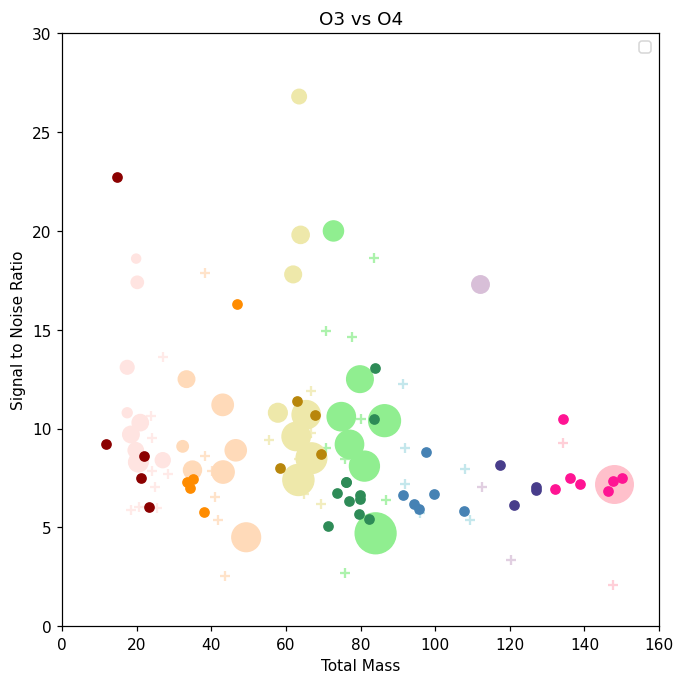

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([5, 155])

for low, high, O3color in zip(bin_lows, bin_highs, O3_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.1 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

for low, high, O4color in zip(bin_lows, bin_highs, O4_colors):
    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color)

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

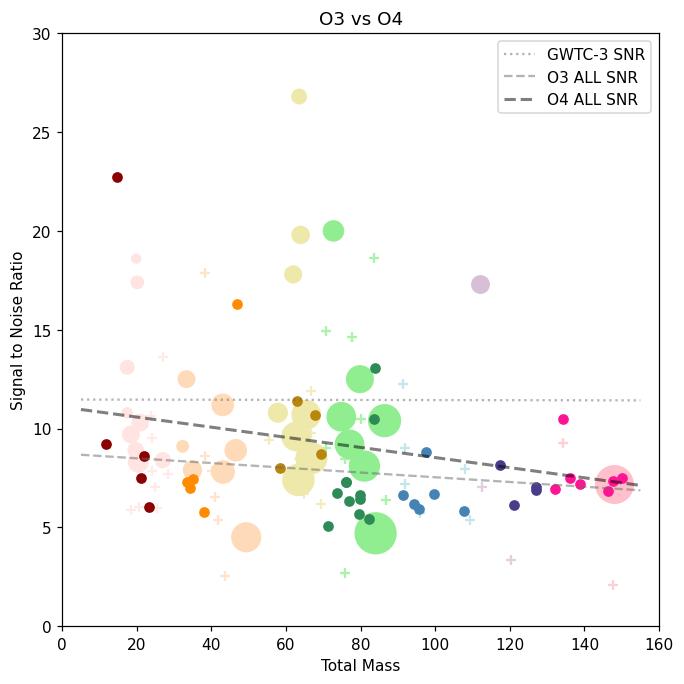

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([5, 155])

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, alpha=0.5, label="GWTC-3 SNR")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, alpha=0.5, label="O3 ALL SNR")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, alpha=0.5, label="O4 ALL SNR")

for low, high, O3color in zip(bin_lows, bin_highs, O3_colors):
    O3values = O3[O3["total_mass"] >= low]
    O3values = O3values[O3values["total_mass"] <= high]

    ax.scatter(O3values["total_mass"], O3values["snr"], 0.1 * O3values["luminosity_distance"], color=O3color)

    O3values_all = O3_events[O3_events["total_mass"] >= low]
    O3values_all = O3values_all[O3values_all["total_mass"] <= high]

    ax.scatter(O3values_all["total_mass"], O3values_all["snr"], marker = "+", alpha=0.75, color=O3color)

for low, high, O4color in zip(bin_lows, bin_highs, O4_colors):
    O4values = O4_events[O4_events["total_mass"] >= low]
    O4values = O4values[O4values["total_mass"] <= high]

    ax.scatter(O4values["total_mass"], O4values["snr"], color=O4color)

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

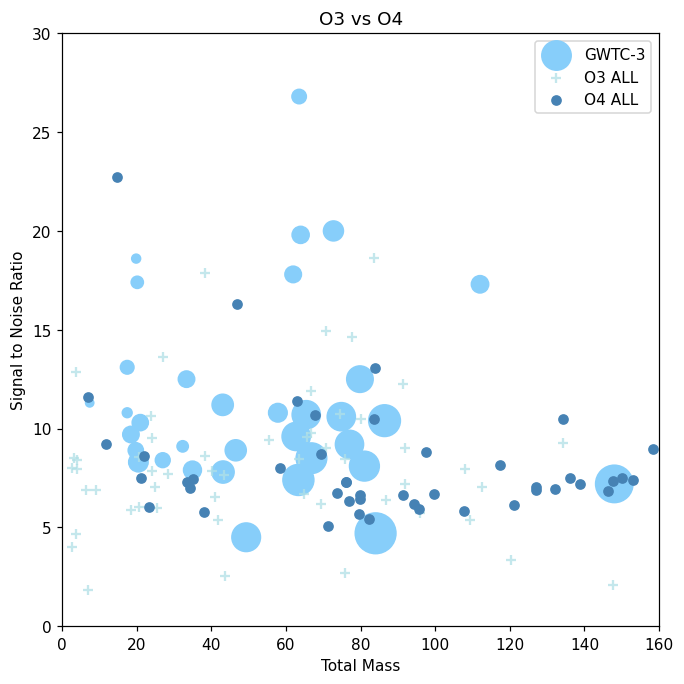

In [13]:
ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

# O3 ALL

ax.scatter(O3_events["total_mass"], O3_events["snr"], marker="+", color="powderblue", alpha=0.75, label="O3 ALL")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

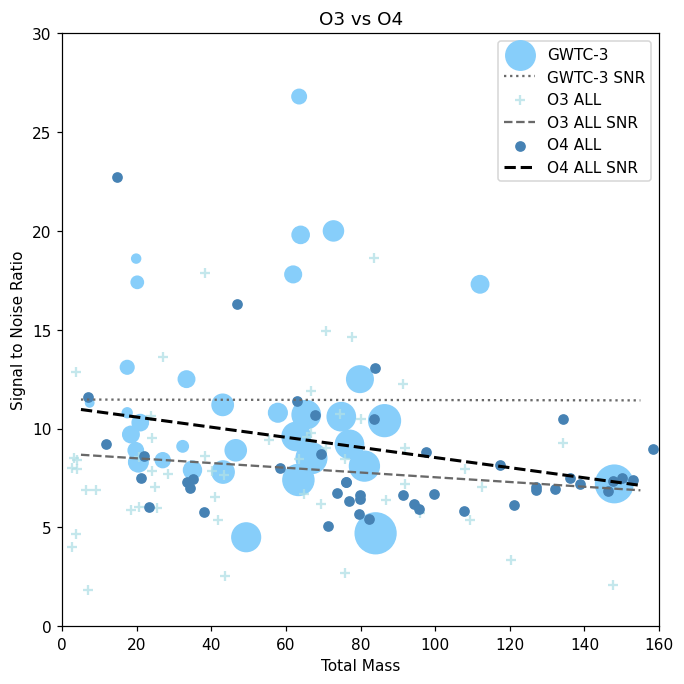

In [14]:
ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, label="GWTC-3 SNR")

# O3 ALL

ax.scatter(O3_events["total_mass"], O3_events["snr"], marker="+", color="powderblue", alpha=0.75, label="O3 ALL")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, label="O3 ALL SNR")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, label="O4 ALL SNR")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

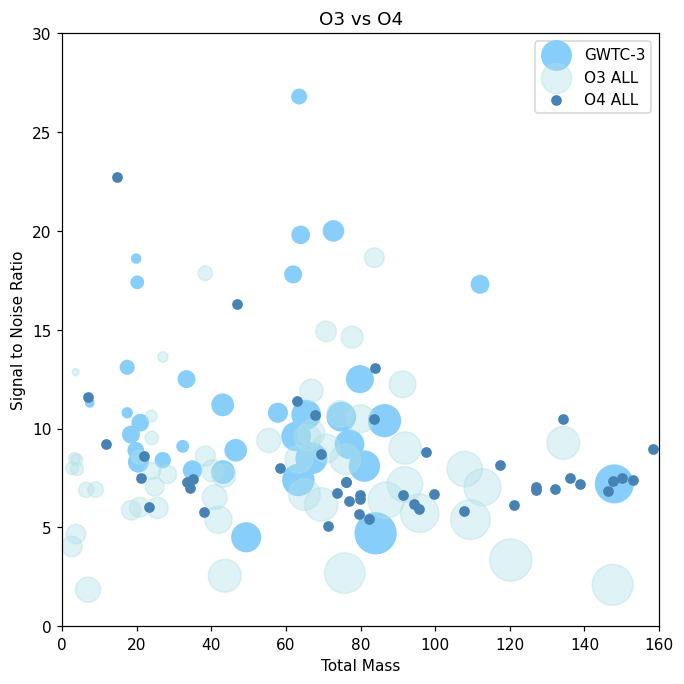

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

# O3 ALL

ax.scatter(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 0.1 * O3_all_predicted["luminosity_distance"], alpha=0.4, color="powderblue", label="O3 ALL")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

Text(0.5, 1.0, 'O3 vs O4')

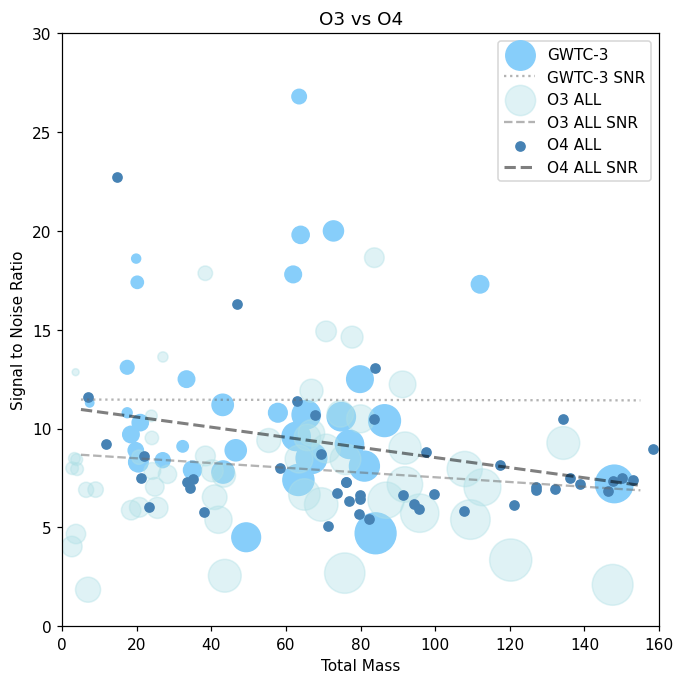

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [130, 110, 90, 70, 50, 30, 10]
bin_highs = [150, 130, 110, 90, 70, 50, 30]

line_values = np.array([5, 155])

# GWTC-3

ax.scatter(O3["total_mass"], O3["snr"], 0.1 * O3["luminosity_distance"], color="lightskyblue", label="GWTC-3")

aO3, bO3 = np.polyfit(O3["total_mass"], O3["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle=":", linewidth=1.5, alpha=0.5, label="GWTC-3 SNR")

# O3 ALL

ax.scatter(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 0.1 * O3_all_predicted["luminosity_distance"], alpha=0.4, color="powderblue", label="O3 ALL")

aO3, bO3 = np.polyfit(O3_all_predicted["total_mass"], O3_all_predicted["snr"], 1)
ax.plot(line_values, aO3 * line_values + bO3, color="dimgrey", linestyle="--", linewidth=1.5, alpha=0.5, label="O3 ALL SNR")

# O4 ALL

ax.scatter(O4_events["total_mass"], O4_events["snr"], color="steelblue", label="O4 ALL")

aO4, bO4 = np.polyfit(O4_events["total_mass"], O4_events["snr"], 1)
ax.plot(line_values, aO4 * line_values + bO4, color="black", linestyle="--", linewidth=2, alpha=0.5, label="O4 ALL SNR")

ax.legend()

ax.set_xlabel("Total Mass")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 160)
ax.set_ylim(0, 30)

ax.set_title("O3 vs O4")

I'm trying to understand the outputs of the model below using fake O3 data.

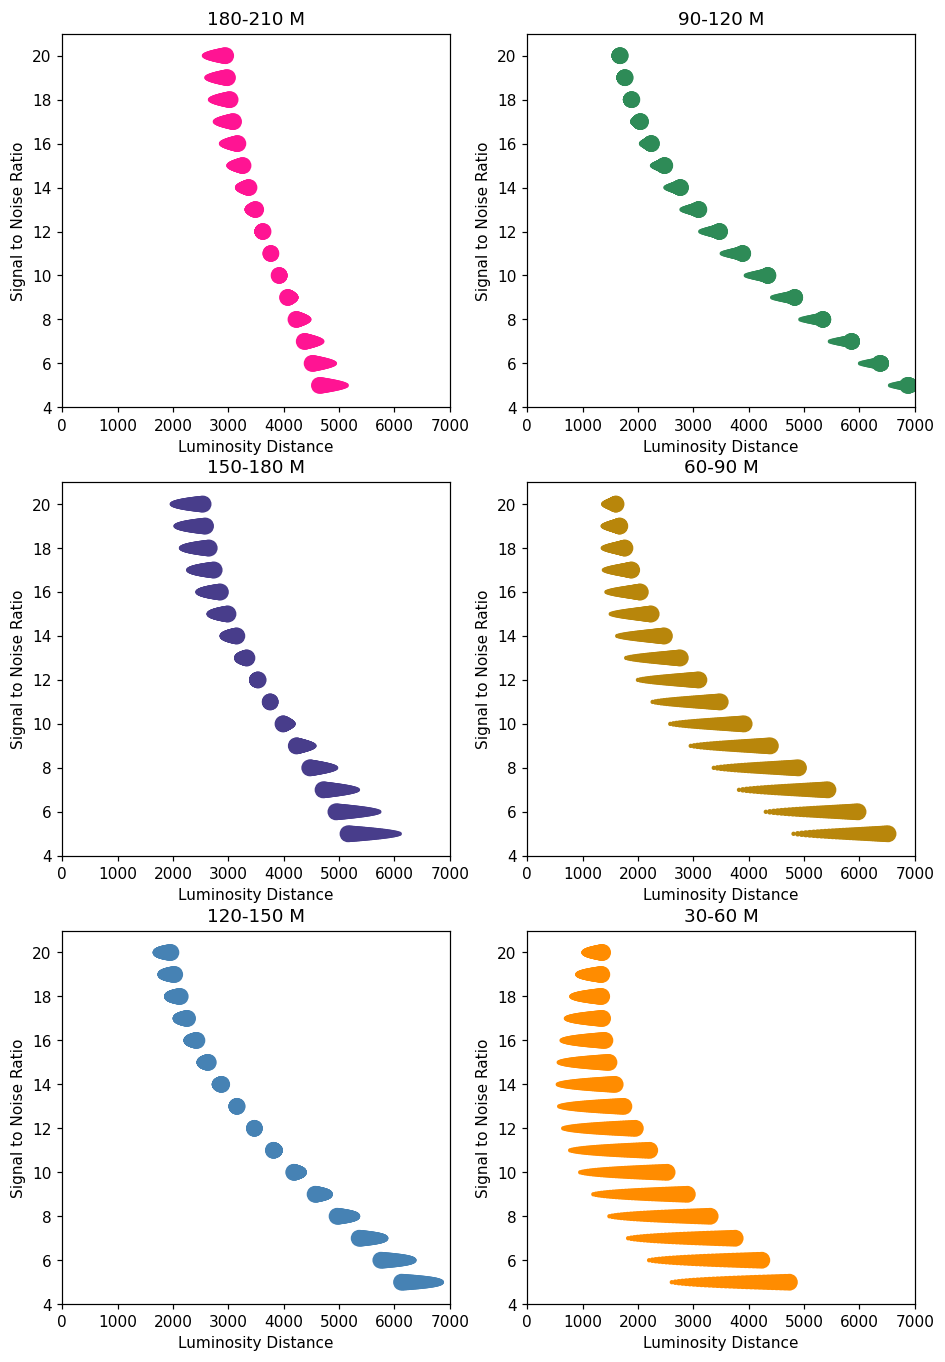

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15), dpi=110)

# setting bins
bin_lows = [180, 150, 120, 90, 60, 30]
bin_highs = [210, 180, 150, 120, 90, 60]
O3_colors = ["pink", "thistle", "powderblue", "lightgreen", "palegoldenrod", "peachpuff", "mistyrose"]
O4_colors = ["deeppink", "darkslateblue", "steelblue", "seagreen", "darkgoldenrod", "darkorange", "darkred"]

line_values = np.array([0, 210])

for low, high, O3color, ri, li in zip(bin_lows, bin_highs, O4_colors, [0, 1, 2, 0, 1, 2], [0, 0, 0, 1, 1, 1]):
    values = O3_mock[O3_mock["total_mass"] >= low]
    values = values[values["total_mass"] <= high]

    values = values[values["snr"] >= 5]

    scaled_masses = MinMaxScaler().fit_transform(np.array(values["total_mass"]).reshape(-1, 1))

    ax[ri, li].scatter(values["luminosity_distance"], values["snr"], 100 * scaled_masses, alpha=1, color=O3color, label=f"{low}-{high} M")

    ax[ri, li].set_xlabel("Luminosity Distance")
    ax[ri, li].set_ylabel("Signal to Noise Ratio")

    ax[ri, li].set_xlim(0, 7000)
    ax[ri, li].set_ylim(4, 21)

    ax[ri, li].set_title(f"{low}-{high} M")

Binning

Removing Neutron Star Events

In [18]:
def get_bins(df, feature, bins=0):
    max_mass = max(df[feature])
    min_mass = min(df[feature])

    total_bins = bins
    if bins <= 0:
        # Sturge's Rule
        total_bins = round(1 + 3.322 * np.log10(len(df[feature])))

    bin_length = (max_mass - min_mass) / total_bins

    bins = []
    bin_ranges = []

    for i in range(total_bins):
        low = min_mass + bin_length * i
        values = df[df[feature] >= low]

        high = low + bin_length
        values = values[values[feature] <= high]
        
        if len(values[feature]) != 0:
            bins.append(values)
            bin_ranges.append((low, high))

    return bins, bin_ranges

In [19]:
def calculate_slope(x, y, y_intercept):
    y_reduced = y - y_intercept
    
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y_reduced, rcond=None)
    
    return a[0]

# calculates the expected intercept of a set of bins using mean
def mean_intercept(bins, x_feature, y_feature, inverse_x=False):
    intercepts = list()

    for values in bins:
        if len(values[y_feature]) > 1:
            b = 0
            if inverse_x:
                _, b = np.polyfit(1 / values[x_feature], values[y_feature], 1)
            else:
                _, b = np.polyfit(values[x_feature], values[y_feature], 1)
            intercepts.append(b)
    
    return np.mean(intercepts)

# calculates the expected intercept of a dataset using folds
def fold_intercept(df, fold_feature, x_feature, y_feature, folds=10, inverse_x=False):
    intercepts = list()

    for fold in range(1, folds + 1):
        bins, _ = get_bins(df, fold_feature, bins=fold)
        for values in bins:
            if len(values[y_feature]) > 1:
                b = 0
                if inverse_x:
                    _, b = np.polyfit(1 / values[x_feature], values[y_feature], 1)
                else:
                    _, b = np.polyfit(values[x_feature], values[y_feature], 1)
                intercepts.append(b)
    
    return np.median(intercepts)

C:\Users\lucas\AppData\Local\Temp\ipykernel_18772\213111121.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

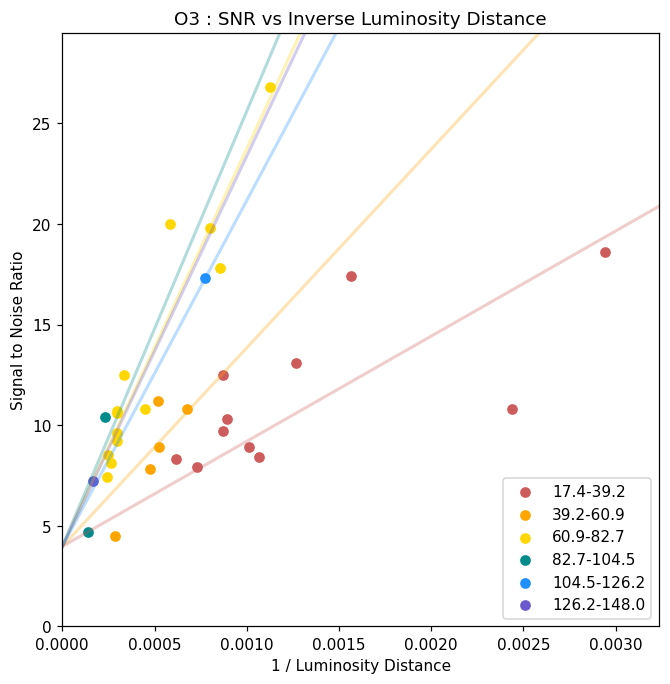

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O3_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]

y_intercept = fold_intercept(O3_clean, "total_mass", "luminosity_distance", "snr", inverse_x=True)
#mean_y_intercept = mean_intercept(bins, "luminosity_distance", "snr", inverse_x=True)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)
    #a2 = calculate_slope(1 / values["luminosity_distance"], values["snr"], mean_y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

    #ax.plot(line_values, a2 * line_values + mean_y_intercept, color=color, linestyle="--", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O3_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O3_clean["snr"]))

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

C:\Users\lucas\AppData\Local\Temp\ipykernel_18772\213111121.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

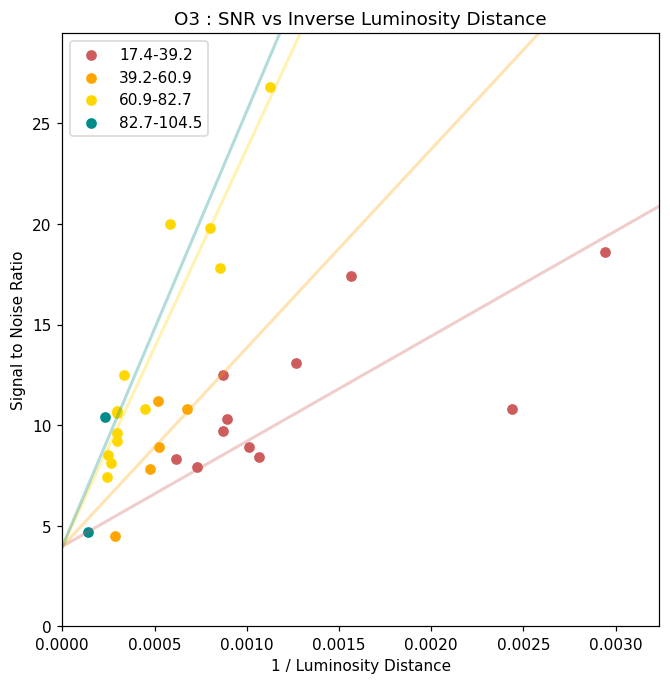

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O3_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]

y_intercept = fold_intercept(O3_clean, "total_mass", "luminosity_distance", "snr", inverse_x=True)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    if len(values["snr"]) > 1:
        a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

        ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

        ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O3_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O3_clean["snr"]))

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

C:\Users\lucas\AppData\Local\Temp\ipykernel_18772\213111121.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O2 : SNR vs Inverse Luminosity Distance')

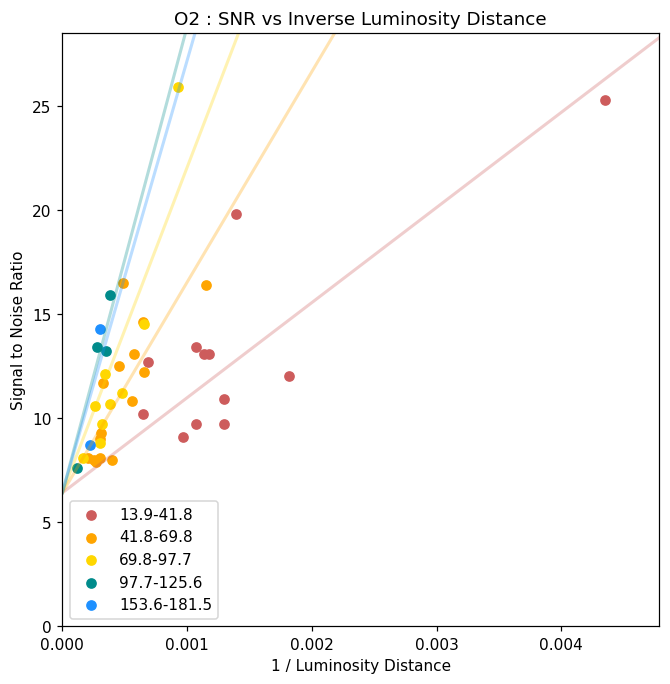

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O2_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]

y_intercept = fold_intercept(O2_clean, "total_mass", "luminosity_distance", "snr", inverse_x=True)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O2_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O2_clean["snr"]))

ax.set_title("O2 : SNR vs Inverse Luminosity Distance")

C:\Users\lucas\AppData\Local\Temp\ipykernel_18772\213111121.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O1 : SNR vs Inverse Luminosity Distance')

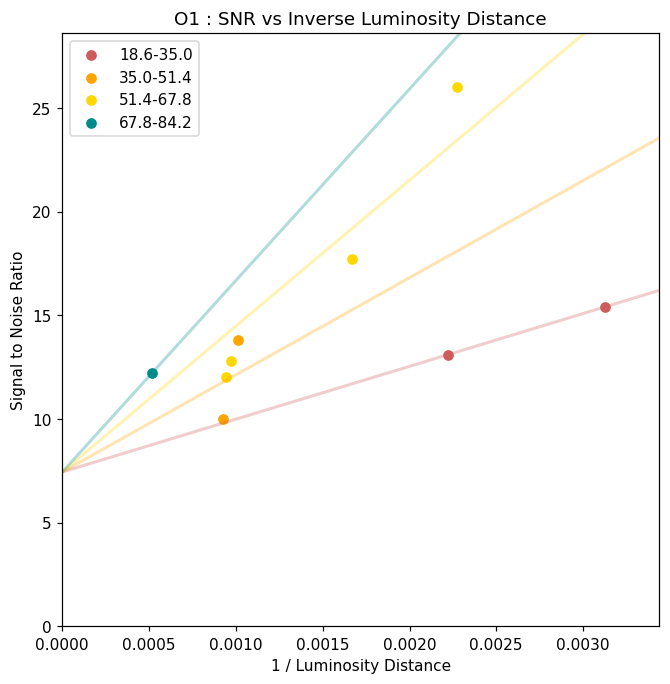

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bins, bin_ranges = get_bins(O1_clean, "total_mass")
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]

y_intercept = fold_intercept(O1_clean, "total_mass", "luminosity_distance", "snr", inverse_x=True)

for values, bin_range, color in zip(bins, bin_ranges, colors):
    a = calculate_slope(1 / values["luminosity_distance"], values["snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["snr"], color=color, label=f"{bin_range[0]:.1f}-{bin_range[1]:.1f}")

    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle="-", linewidth=2, alpha=0.3)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 1.1 * max(1 / O1_clean["luminosity_distance"]))
ax.set_ylim(0, 1.1 * max(O1_clean["snr"]))

ax.set_title("O1 : SNR vs Inverse Luminosity Distance")